In [2]:
import pandas as pd
import json
from os import listdir
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("white")

In [9]:
adult = pd.read_csv('compasEqOp.csv').drop('Unnamed: 0', axis = 1)

bestOfAct = np.argmax(adult.accuracy)
bestOfFair = np.argmin(adult.eps_test)

adult.iloc[[bestOfAct, bestOfFair],:]

,accuracy,accuracy_std,accuracy_train,complexity,complexity_final,epsilon,eqOpTrue_train,eqOpFalse_train,accTrue_train,accFalse_train,eqOpTrue,eqOpFalse,accTrue,accFalse,ip,eps_test,acc_diff,eps_train,acc_diff_train
17,0.678671,0.019447,0.680455,20.0,21.2,0.10,0.491811,0.656250,0.686036,0.676744,0.476482,0.657421,0.680329,0.677707,1625.4,0.180938,0.002622,0.164439,0.009291
3,0.663701,0.025715,0.671930,30.0,20.1,0.01,0.567925,0.625114,0.670405,0.672933,0.553677,0.620885,0.656438,0.668530,1677.3,0.067208,0.012092,0.057189,0.002528


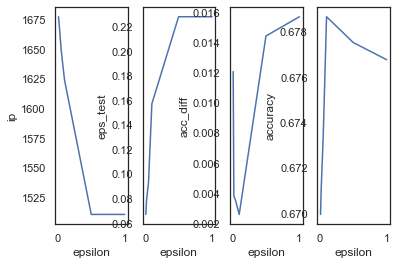

In [4]:
adult_eps = (adult[adult.epsilon > 0]
           .sort_values(by='epsilon', ascending=True)
           .groupby(['epsilon'])
           .agg({"ip": np.min,
                 "eps_test": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

adult_compl = (adult[adult.epsilon > 0]
           .sort_values(by='complexity', ascending=True)
           .groupby(['complexity'])
           .agg({"ip": np.min,
                 "eps_test": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

adult_eps_test = (adult
           .sort_values(by='eps_test', ascending=True)
           .groupby(['eps_test'])
           .agg({"ip": np.min,
                              "acc_diff": np.min,
                             "accuracy": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))


fg, ax = plt.subplots(1, 4)

sns.lineplot(data=adult_eps, x='epsilon', y='ip', ax = ax[0])
sns.lineplot(data=adult_eps, x='epsilon', y='eps_test', ax = ax[1])
sns.lineplot(data=adult_eps, x='epsilon', y='acc_diff', ax = ax[2])

sns.lineplot(data=adult_eps, x='epsilon', y='accuracy', ax = ax[3])

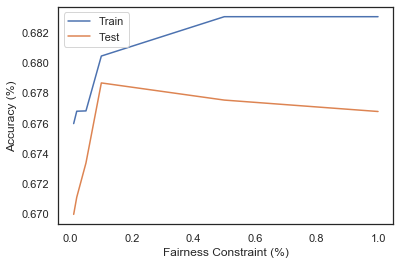

In [5]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Train")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Test")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')
plt.savefig("compas_EpsVAccuracy.png")

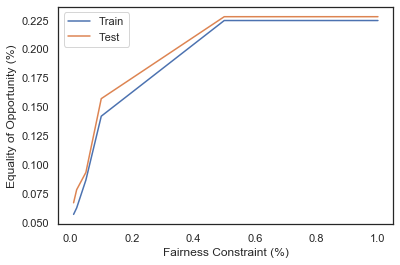

In [6]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_train', label = "Train")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_test', label = "Test")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity (%)')
plt.savefig("compas_EpsVEqOp.png")

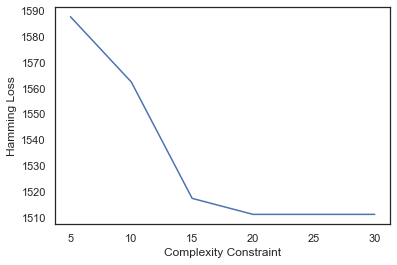

In [7]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ip')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("compas_complexVloss.png")

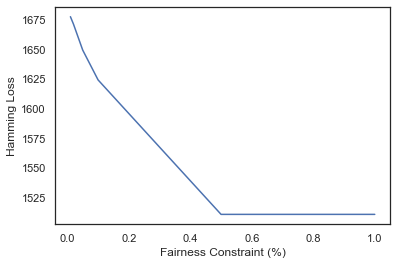

In [8]:
plot = sns.lineplot(data=adult_eps, x='epsilon', y = 'ip')

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("compas_hammingVeps.png")